<a href="https://colab.research.google.com/github/tekinonlayn/turbojet/blob/master/turbojet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.metrics

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0-rc2


In [0]:
from google.colab import files
uploaded = files.upload()

import io
dataset = pd.read_csv(io.BytesIO(uploaded['motor_veri_csv.csv']))



Saving motor_veri_csv.csv to motor_veri_csv.csv


In [0]:
dataset.head()
laynum = 16

In [0]:
input_col = dataset.loc[:, 'AC_In_Temp':'GT_Out_Temp']
input_col.head()
output_col = dataset.loc[:, 'Thrust':'Fuel_Flow']
output_col.head()
dataset1 = pd.concat([input_col, output_col['Thrust']], axis=1)
dataset2 = pd.concat([input_col, output_col['Fuel_Flow']], axis=1)

print(dataset1.head())
print(dataset2.head())

   AC_In_Temp  AC_Out_Temp  CC_In_Temp  ...  GT_In_Temp  GT_Out_Temp   Thrust
0     23.0607      26.4326     26.4326  ...    599.1545     417.9822  27.5908
1     23.0607      26.4326     26.4326  ...    599.1545     417.9822  27.5646
2     23.0607      26.4326     26.4326  ...    598.0249     417.9822  27.6104
3     23.0607      26.4326     26.4326  ...    598.0249     417.9822  27.6696
4     23.0607      26.4326     26.4326  ...    598.0249     417.9822  27.6630

[5 rows x 7 columns]
   AC_In_Temp  AC_Out_Temp  CC_In_Temp  ...  GT_In_Temp  GT_Out_Temp  Fuel_Flow
0     23.0607      26.4326     26.4326  ...    599.1545     417.9822       0.77
1     23.0607      26.4326     26.4326  ...    599.1545     417.9822       0.77
2     23.0607      26.4326     26.4326  ...    598.0249     417.9822       0.77
3     23.0607      26.4326     26.4326  ...    598.0249     417.9822       0.77
4     23.0607      26.4326     26.4326  ...    598.0249     417.9822       0.77

[5 rows x 7 columns]


In [0]:

#d2l.set_figsize((3.5, 2.5))
#plt.scatter(dataset[:, 5], dataset[:,6])

train_stats = dataset.describe()
train_stats = train_stats.transpose()
train_stats

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(dataset)
#normed_test_data = norm(dataset)
print(normed_train_data)
dafr = pd.DataFrame(normed_train_data, columns=['AC_In_Temp','AC_Out_Temp','CC_In_Temp', \
                                     'CC_Out_Temp','GT_In_Temp','GT_Out_Temp', \
                                    'Thrust','Fuel_Flow'])




      AC_In_Temp  AC_Out_Temp  CC_In_Temp  ...  GT_Out_Temp    Thrust  Fuel_Flow
0       0.828819    -1.464364   -1.464364  ...     0.496326 -0.853024  -1.511656
1       0.828819    -1.464364   -1.464364  ...     0.496326 -0.853951  -1.511656
2       0.828819    -1.464364   -1.464364  ...     0.496326 -0.852331  -1.511656
3       0.828819    -1.464364   -1.464364  ...     0.496326 -0.850236  -1.511656
4       0.828819    -1.464364   -1.464364  ...     0.496326 -0.850469  -1.511656
...          ...          ...         ...  ...          ...       ...        ...
1572   -1.243281     1.162810    1.162810  ...     1.681413  1.788123   1.338715
1573   -1.243281     1.162810    1.162810  ...     1.681413  1.798817   1.338715
1574   -1.643427     1.162810    1.162810  ...     1.424852  1.804627   1.338715
1575   -1.643427     1.153670    1.153670  ...     1.424852  1.801605   1.338715
1576   -1.643427     1.153670    1.153670  ...     1.424852  1.775107   1.338715

[1577 rows x 8 columns]


Correlations between: 

AC_In_Temp Thrust 
 [[ 1.        -0.7745619]
 [-0.7745619  1.       ]] 

AC_Out_Temp Thrust 
 [[1.         0.92470743]
 [0.92470743 1.        ]] 

CC_In_Temp Thrust 
 [[1.         0.92470743]
 [0.92470743 1.        ]] 

CC_Out_Temp Thrust 
 [[1.         0.38853097]
 [0.38853097 1.        ]] 

GT_In_Temp Thrust 
 [[1.         0.38853097]
 [0.38853097 1.        ]] 

GT_Out_Temp Thrust 
 [[1.         0.62480772]
 [0.62480772 1.        ]] 

AC_In_Temp Fuel_Flow 
 [[ 1.         -0.82279231]
 [-0.82279231  1.        ]] 

AC_Out_Temp Fuel_Flow 
 [[1.         0.97964572]
 [0.97964572 1.        ]] 

CC_In_Temp Fuel_Flow 
 [[1.         0.97964572]
 [0.97964572 1.        ]] 

CC_Out_Temp Fuel_Flow 
 [[1.         0.10969944]
 [0.10969944 1.        ]] 

GT_In_Temp Fuel_Flow 
 [[1.         0.10969944]
 [0.10969944 1.        ]] 

GT_Out_Temp Fuel_Flow 
 [[1.         0.28398178]
 [0.28398178 1.        ]] 



'\n*AC_In_Temp - Thrust (-0.77)\n*AC_Out_Temp - Thrust = CC_In_Temp - Thrust = Best (0.92)\nCC_Out_Temp - Thrust = GT_In_Temp - Thrust = Worst (0.38) \n*GT_Out_Temp - Thrust (0.62)\n\n*AC_In_Temp - Fuel_Flow (-0.82)\n*AC_Out_Temp - Fuel_Flow = CC_In_Temp - Fuel_Flow = Best (0.98)\nCC_Out_Temp - Fuel_Flow = GT_In_Temp - Fuel_Flow = Worst (0.11)\nGT_Out_Temp - Fuel_Flow (0.28)\n\nnormed_train_data1\n'

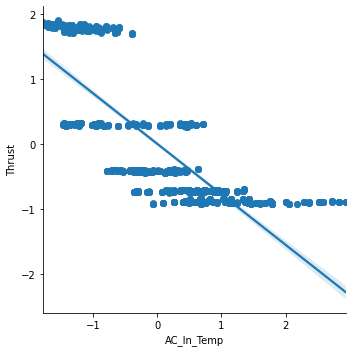

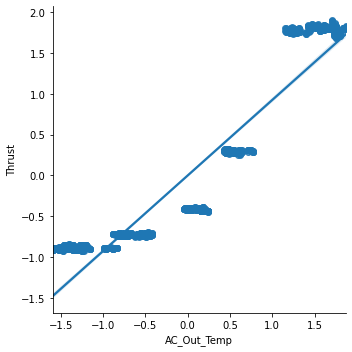

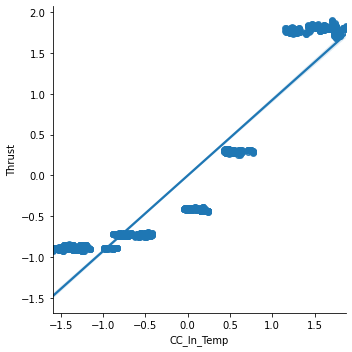

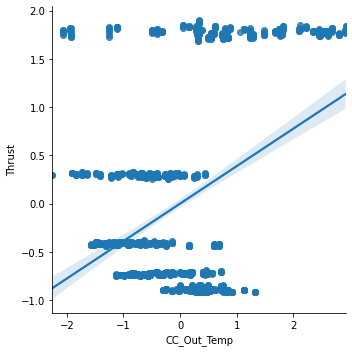

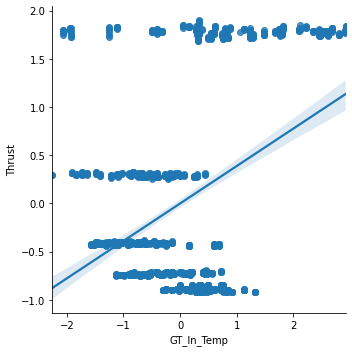

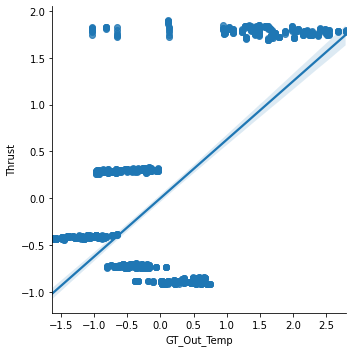

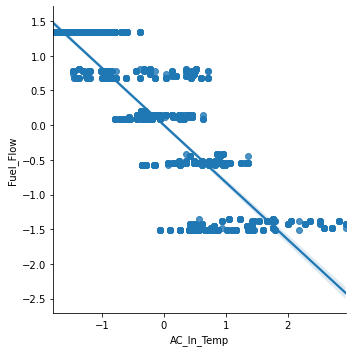

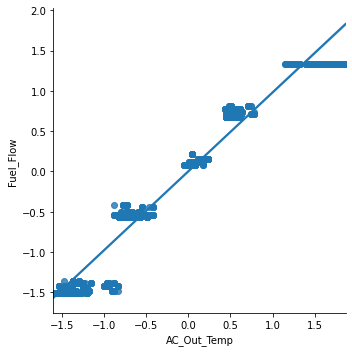

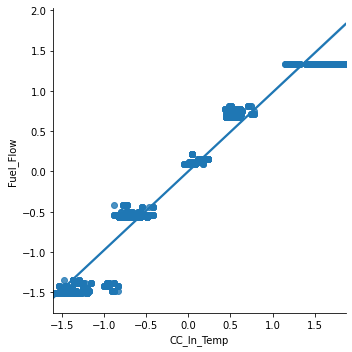

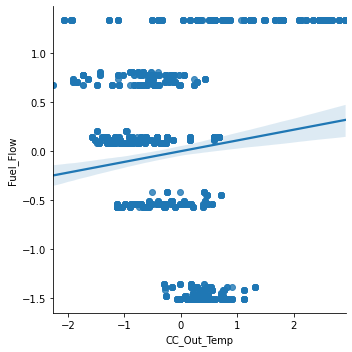

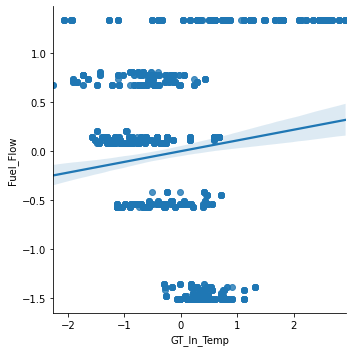

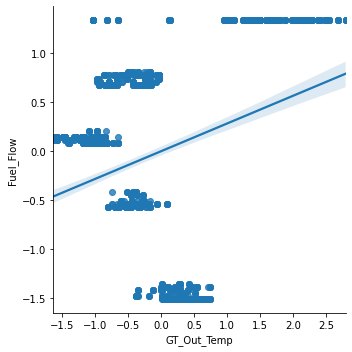

In [0]:
#Korelasyon için.

xx = ['AC_In_Temp','AC_Out_Temp','CC_In_Temp','CC_Out_Temp','GT_In_Temp','GT_Out_Temp']
yy = ['Thrust','Fuel_Flow']
print("Correlations between: \n")
for iy in yy:
  for ix in xx:
    print(ix, iy, '\n', np.corrcoef(dafr[ix], dafr[iy]), '\n')
    sns.lmplot(x=ix, y=iy, data=dafr)

"""
*AC_In_Temp - Thrust (-0.77)
*AC_Out_Temp - Thrust = CC_In_Temp - Thrust = Best (0.92)
CC_Out_Temp - Thrust = GT_In_Temp - Thrust = Worst (0.38) 
*GT_Out_Temp - Thrust (0.62)

*AC_In_Temp - Fuel_Flow (-0.82)
*AC_Out_Temp - Fuel_Flow = CC_In_Temp - Fuel_Flow = Best (0.98)
CC_Out_Temp - Fuel_Flow = GT_In_Temp - Fuel_Flow = Worst (0.11)
GT_Out_Temp - Fuel_Flow (0.28)

normed_train_data1
"""

In [0]:
train_dataset1 = dataset1.sample(frac=0.8,random_state=0)
test_dataset1 = dataset1.drop(train_dataset1.index)

train_dataset2 = dataset2.sample(frac=0.8,random_state=0)
test_dataset2 = dataset2.drop(train_dataset2.index)


In [0]:
train_stats1 = train_dataset1.describe()
train_stats1.pop("Thrust")
train_stats1 = train_stats1.transpose()
train_stats1

train_stats2 = train_dataset2.describe()
train_stats2.pop("Fuel_Flow")
train_stats2 = train_stats2.transpose()
train_stats2


,count,mean,std,min,25%,50%,75%,max
AC_In_Temp,1262.0,21.738178,1.563313,18.9349,20.3647,21.96220,22.79635,26.3882
AC_Out_Temp,1262.0,36.016468,6.512002,25.5581,30.8824,36.32215,39.91670,48.0855
CC_In_Temp,1262.0,36.016468,6.512002,25.5581,30.8824,36.32215,39.91670,48.0855
CC_Out_Temp,1262.0,595.937929,9.616910,574.3137,589.1999,595.06190,600.46140,624.0201
GT_In_Temp,1262.0,595.937929,9.616910,574.3137,589.1999,595.06190,600.46140,624.0201
GT_Out_Temp,1262.0,413.083720,9.972664,396.7232,406.3543,410.58630,417.93410,440.9423


In [0]:
train_labels1 = train_dataset1.pop('Thrust')
test_labels1 = test_dataset1.pop('Thrust')

train_labels2 = train_dataset2.pop('Fuel_Flow')
test_labels2 = test_dataset2.pop('Fuel_Flow')

train_labels1

1514    101.8058
18       27.6040
233      26.1984
1487    101.9044
271      25.8700
          ...   
715      39.2806
832      39.7274
951      40.0688
1144     60.1218
1037     59.8000
Name: Thrust, Length: 1262, dtype: float64

In [0]:
def norm1(x):
  return (x - train_stats1['mean']) / train_stats1['std']
normed_train_data1 = norm1(train_dataset1)
normed_test_data1 = norm1(test_dataset1)

def norm2(x):
  return (x - train_stats2['mean']) / train_stats2['std']
normed_train_data2 = norm2(train_dataset2)
normed_test_data2 = norm2(test_dataset2)

normed_train_data1

,AC_In_Temp,AC_Out_Temp,CC_In_Temp,CC_Out_Temp,GT_In_Temp,GT_Out_Temp
1514,-1.138785,1.257683,1.257683,0.552409,0.552409,1.482882
18,0.525117,-1.452866,-1.452866,0.750124,0.750124,0.649183
233,1.255937,-1.379985,-1.379985,-0.017670,-0.017670,0.011690
1487,-0.913238,1.223177,1.223177,2.611855,2.611855,1.875013
271,0.101913,-1.526208,-1.526208,0.766459,0.766459,0.612041
...,...,...,...,...,...,...
715,0.133385,0.224560,0.224560,0.158613,0.158613,-1.591733
832,0.439657,0.104274,0.104274,-0.591170,-0.591170,-1.196372
951,-0.321610,0.024268,0.024268,-0.942322,-0.942322,-0.845433
1144,0.452899,0.471749,0.471749,-0.471516,-0.471516,-0.396807


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(laynum, activation='relu', input_shape=[len(train_dataset1.keys())]),
    layers.Dense(laynum, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss="mse",
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
print("input shape:", len(train_dataset1.keys()))
model = build_model()
model.summary()

input shape: 6
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = normed_train_data1[:10]
example_result = model.predict(example_batch)
example_result

array([[ 1.1325948 ],
       [ 0.66452134],
       [ 0.70370966],
       [ 2.790408  ],
       [ 0.66618794],
       [-0.0891003 ],
       [ 0.5004054 ],
       [ 0.04894945],
       [-0.04276145],
       [ 1.1462498 ]], dtype=float32)

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 250

history = model.fit(
  normed_train_data1, train_labels1,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
..................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
245,4.862645,1.465776,4.858587,5.625295,1.669343,5.602813,245
246,4.850484,1.460430,4.847651,5.455348,1.666242,5.441866,246
247,4.799867,1.469596,4.863439,5.553969,1.673174,5.550086,247
248,4.819135,1.466255,4.825239,5.453966,1.647561,5.449574,248
249,4.692791,1.442062,4.730174,5.457478,1.636662,5.440607,249


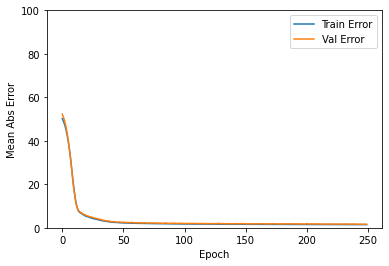

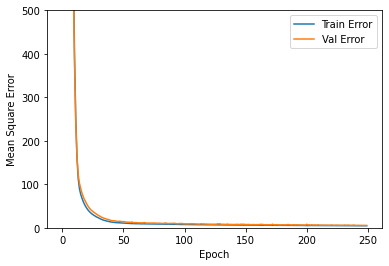

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,500])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
..............................................

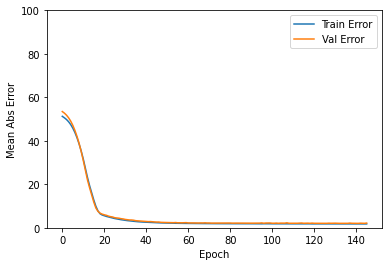

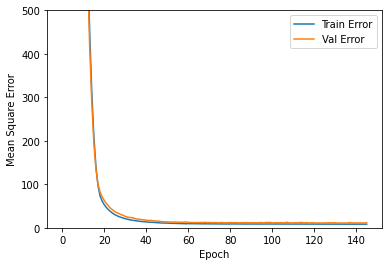

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data1, train_labels1, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_data1, test_labels1, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Thrust".format(mae))

10/10 - 0s - loss: 9.8911 - mae: 1.9774 - mse: 9.6029
Testing set Mean Abs Error:  1.98 Thrust


Correlation:  [[1.         0.99414715]
 [0.99414715 1.        ]]
R square (R^2): 0.987356


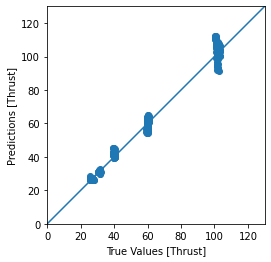

In [0]:
test_predictions = model.predict(normed_test_data1).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels1, test_predictions)
plt.xlabel('True Values [Thrust]')
plt.ylabel('Predictions [Thrust]')
lims = [0, 130]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

import numpy as np
print("Correlation: ", np.corrcoef(test_labels1, test_predictions))

print("R square (R^2): %f" % sklearn.metrics.r2_score(test_labels1, test_predictions))

<Figure size 30000x24000 with 0 Axes>

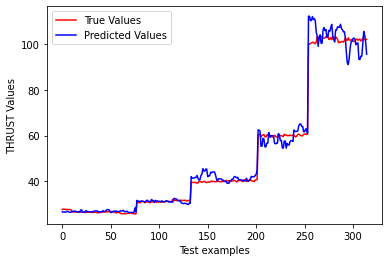

<Figure size 30000x24000 with 0 Axes>

In [0]:
plt.plot(test_labels1.values, "r")
plt.plot(test_predictions,"b")
plt.xlabel('Test examples')
plt.ylabel('THRUST Values')
plt.legend(["True Values","Predicted Values"])
plt.figure(figsize=(100,80), dpi=300)

<Figure size 30000x24000 with 0 Axes>

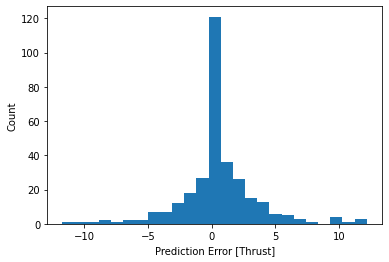

<Figure size 30000x24000 with 0 Axes>

In [0]:

error = test_predictions - test_labels1
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Thrust]")
_ = plt.ylabel("Count")
plt.figure(figsize=(100,80), dpi=300)


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(laynum, activation='relu', input_shape=[len(train_dataset2.keys())]),
    layers.Dense(laynum, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
print("input shape:", len(train_dataset2.keys()))
model2 = build_model()
model2.summary()

input shape: 6
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = normed_train_data2[:10]
example_result = model2.predict(example_batch)
example_result

array([[-0.24823521],
       [-0.503416  ],
       [-0.12334879],
       [-0.8758284 ],
       [-0.62729317],
       [-0.1724007 ],
       [-0.4557887 ],
       [-0.28754777],
       [-0.10200687],
       [-0.24698529]], dtype=float32)

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 250

history = model2.fit(
  normed_train_data2, train_labels2,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
..................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
245,0.000439,0.015986,0.000441,0.000712,0.020735,0.000706,245
246,0.000483,0.017034,0.000483,0.000910,0.024643,0.000904,246
247,0.000408,0.015252,0.000411,0.000369,0.014694,0.000367,247
248,0.000469,0.016785,0.000472,0.000385,0.015803,0.000384,248
249,0.000451,0.016485,0.000450,0.000990,0.025426,0.000982,249


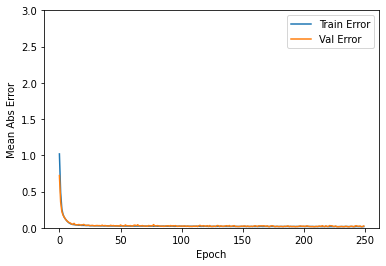

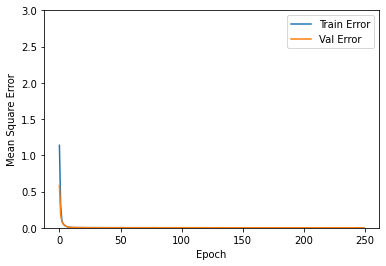

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,3])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,3])
  plt.legend()
  plt.show()


plot_history(history)


.................................................

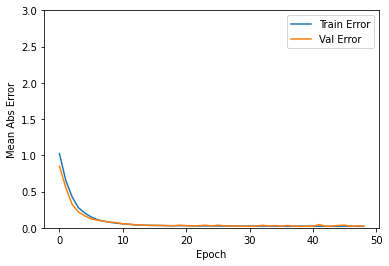

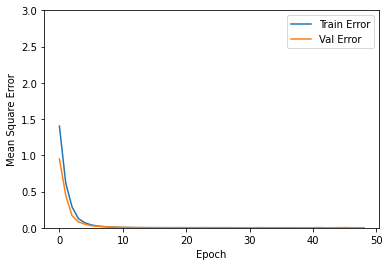

In [0]:
model2 = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model2.fit(normed_train_data2, train_labels2, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model2.evaluate(normed_test_data2, test_labels2, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Fuel Flow".format(mae))

10/10 - 0s - loss: 8.4116e-04 - mae: 0.0233 - mse: 8.4200e-04
Testing set Mean Abs Error:  0.02 Fuel Flow


Correlation:  [[1.         0.99726309]
 [0.99726309 1.        ]]
R square (R^2): 0.991868


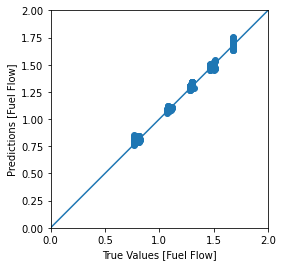

In [0]:
test_predictions = model2.predict(normed_test_data2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels2, test_predictions)
plt.xlabel('True Values [Fuel Flow]')
plt.ylabel('Predictions [Fuel Flow]')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

import numpy as np
print("Correlation: ", np.corrcoef(test_labels2, test_predictions))

print("R square (R^2): %f" % sklearn.metrics.r2_score(test_labels2, test_predictions))

<Figure size 30000x24000 with 0 Axes>

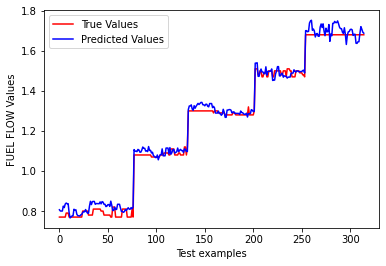

<Figure size 30000x24000 with 0 Axes>

In [0]:
plt.plot(test_labels2.values, "r")
plt.plot(test_predictions,"b")
plt.xlabel('Test examples')
plt.ylabel('FUEL FLOW Values')
plt.legend(["True Values","Predicted Values"])
plt.figure(figsize=(100,80), dpi=300)

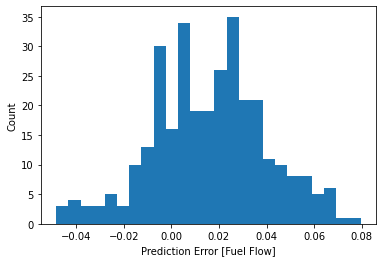

In [0]:
error = test_predictions - test_labels2
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Fuel Flow]")
_ = plt.ylabel("Count")
#plt.figure(figsize=(100,80), dpi=300)
